In [2]:
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import string
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

font = {'weight': 'normal', 'family': 'DejaVu Sans'}

plt.rc('text', usetex=True)
plt.rc('font', **font)
plt.rcParams['font.size'] = 24



class HandlerCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        
        center = 0.8 * width, 0.4 * height
        p = mpatches.Circle(xy=center, radius = 8)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

def save_fig(figs, figname):

    if (type(figs) is list):
        for q, fig in enumerate(figs):
            fig.savefig('%s_%d.pdf' % (figname, q), bbox_inches = 'tight')
            fig.savefig('%s_%d.png' % (figname, q), bbox_inches = 'tight', dpi = 300)
    else:
        figs.savefig('%s.pdf' % (figname), bbox_inches = 'tight')
        figs.savefig('%s.svg' % (figname), bbox_inches = 'tight')
        figs.savefig('%s.png' % (figname), bbox_inches = 'tight', dpi = 300)
      

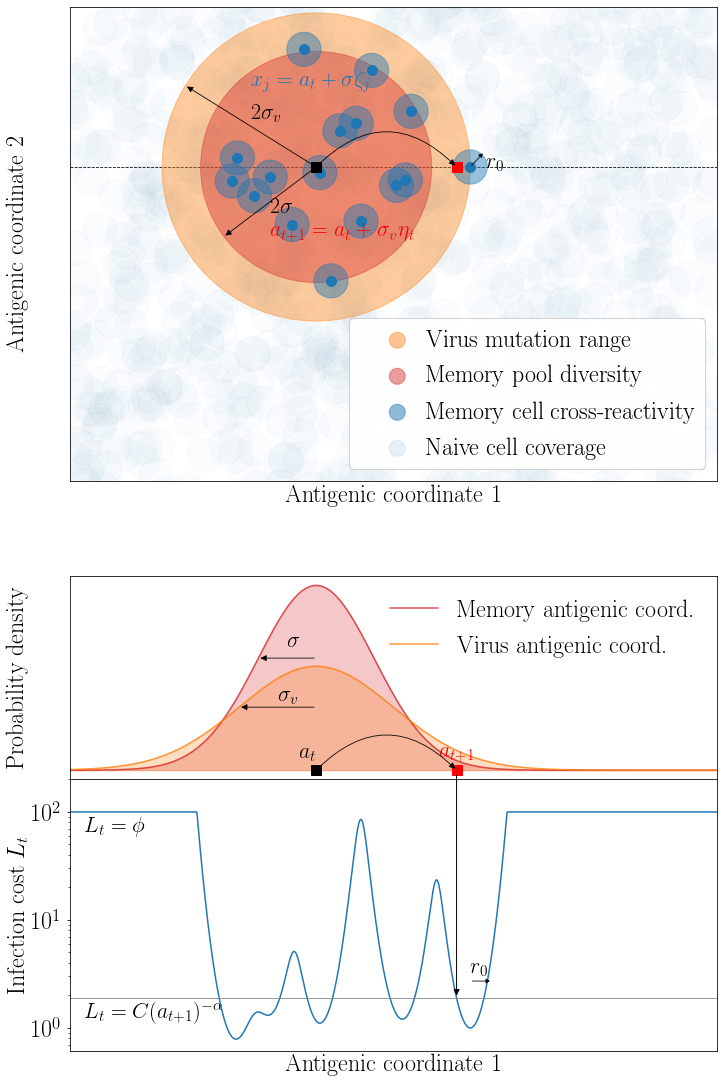

In [23]:
sigv = 4.5
sig = 0.75*sigv
phi = 100
dim = 2

#avm = 16
#m = np.random.poisson(avm)
m = 15

xv = 8.2
yv = 0
xm_ex = 9
ym_ex = 0



xp = np.random.normal(0, sig, size = m)
yp = np.random.normal(0, sig, size = m)
xp = np.append(xp, xm_ex)
yp = np.append(yp, ym_ex)


xmin = -3.2*sigv
xmax = 5.2*sigv
ymin = -6.5*sigv
ymax = 4.5*sigv

x = np.linspace(xmin, xmax, 50)
y = np.linspace(ymin, ymax, 50)

xn = np.random.uniform(xmin, xmax, size = 1400)
yn = np.random.uniform(ymin, ymax, size = 1400)

xs, ys = np.meshgrid(x, y)


t = np.linspace(xmin, xmax, 1000)
slope = yv/xv
yslice = slope*t
xslice = t

fig = plt.figure(figsize = (11.6, 2*9.6))

gs = fig.add_gridspec(2, 1, height_ratios = [1, 1])
gs00 = gs[0].subgridspec(1, 1)
ax2d = fig.add_subplot(gs00[0, 0])




#min_mem = np.argmin(xp)


#a = 0.8
#b = np.sqrt(1.4 - a**2)
#jump = mpatches.FancyArrowPatch((xp[min_mem], yp[min_mem]), (xp[min_mem] + a, yp[min_mem] + b), linewidth = 0.8,
       #                      connectionstyle="arc3", zorder = 16, **kw)

#ax2d.add_artist(jump)
#ax2d.annotate(r'$r_0$', 
 #             (xp[min_mem] + 0.2*xp[min_mem], yp[min_mem]),
 #             fontsize = 20)

style = "-|>, head_length=3.0, head_width=2"
kw = dict(arrowstyle=style, color="k")
max_mem = -1
a = 0.8
b = np.sqrt(1.4 - a**2)
jump = mpatches.FancyArrowPatch((xp[max_mem], yp[max_mem]), (xp[max_mem] + a, yp[max_mem] + b), linewidth = 0.8,
                             connectionstyle="arc3", zorder = 16, **kw)

ax2d.add_artist(jump)
ax2d.annotate(r'$r_0$', 
              (xp[max_mem] + 0.1*xp[max_mem], yp[max_mem]),
               fontsize = 22, zorder = 16)

r_virus = 2*sigv
r_mem = 2*sig
virus_mutation = plt.Circle((0, 0), r_virus, 
                             color = 'C1',
                             alpha = 0.4, 
                             linestyle = 'None',
                             zorder = 8)

ax2d.add_artist(virus_mutation)

style = "-|>, head_length=5.0, head_width=2.5"
kw = dict(arrowstyle=style, color="k")
a = -1.7*sigv
b = np.sqrt((2*sigv)**2 + 0.2 - a**2)
jump = mpatches.FancyArrowPatch((0, 0), (a, b), linewidth = 0.8,
                             connectionstyle="arc3", zorder = 16, **kw)

ax2d.add_artist(jump)
ax2d.annotate(r'$2 \sigma_v$', (a/2, b/2 + 0.2*abs(b)/2), 
              fontsize = 22, zorder = 16)

ax2d.annotate(r'$x_{j} = a_{t} + \sigma \zeta_{j}$', (a/2, b),
              zorder = 16, fontsize = 22, color = 'C0')

style = "-|>, head_length=5.0, head_width=2.5"
kw = dict(arrowstyle=style, color="k")
a = -1.2*sigv
b = -np.sqrt((2*sig)**2 + 0.2 - a**2)
jump = mpatches.FancyArrowPatch((0, 0), (a, b), linewidth = 0.8,
                             connectionstyle="arc3", zorder = 16, **kw)

ax2d.add_artist(jump)
ax2d.annotate(r'$2 \sigma$', (a/2, b/2 - 0.3*abs(b)/2),
              fontsize = 22, zorder = 16)

ax2d.annotate(r'$a_{t+1} = a_{t} + \sigma_v \eta_{t}$', (a/2, b), 
              zorder = 16, fontsize = 22, color = 'r')

immune_mem = plt.Circle((0, 0), r_mem, 
                        color = 'C3',
                        alpha = 0.4, 
                        linestyle = 'None',
                        zorder = 9)

ax2d.add_artist(immune_mem)


lslice, = ax2d.plot(xslice, yslice, '--', linewidth = 0.8, color = 'k')
strain_0, = ax2d.plot(0, 0, 'ks', markersize = 10, label = r'Strain $a_n$', zorder = 15)
strain_1, = ax2d.plot(xv, yv, 'rs', markersize = 10, label = r'Strain $a_{n+1}$', zorder = 15)
mem, = ax2d.plot(xp, yp, 'C0o', markersize = 10, zorder = 14)
ax2d.set_aspect('equal', adjustable = 'datalim')

ax2d.set_xlim([xmin, xmax])
ax2d.set_ylim([ymin, ymax])
ax2d.set_xticks([])
ax2d.set_yticks([])
ax2d.set_xlabel('Antigenic coordinate $1$')
ax2d.set_ylabel('Antigenic coordinate $2$')

for i in range(len(xp)):
    
    mem = mpatches.Circle((xp[i], yp[i]), 1,
                                alpha = 0.45,
                                color = 'C0', zorder = 10)

    ax2d.add_patch(mem)

    
for i in range(len(xn)):
    
    naive = mpatches.Circle((xn[i], yn[i]), 1,
                            alpha = 0.02,
                            color = 'C0', zorder = 5)

    ax2d.add_patch(naive)
    
naive = mpatches.Circle((0, 0), 1,
                         alpha = 0.09,
                         color = 'C0', zorder = 5)

style = "-|>, head_length=5, head_width=2.5"
kw = dict(arrowstyle=style, color="k")
jump = mpatches.FancyArrowPatch((0, 0), (xv, yv), linewidth = 0.8,
                             connectionstyle="arc3,rad=-.5", zorder = 16, **kw)


ax2d.add_artist(jump)

custom_legend = plt.legend([virus_mutation, immune_mem, mem, naive], 
                           [r'Virus mutation range',
                            r'Memory pool diversity',
                            r'Memory cell cross-reactivity', 
                            r'Naive cell coverage'],
                            handler_map={mpatches.Circle: HandlerCircle()},
                            loc = 'lower right', facecolor = 'w')
custom_legend.set_zorder(18)
ax2d.add_artist(custom_legend)

gs01 = gs[1].subgridspec(2, 1, height_ratios = [0.75, 1], hspace = 0)

ax1 = fig.add_subplot(gs01[0, 0], sharex = ax2d)
ax2 = fig.add_subplot(gs01[1, 0], sharex = ax2d)


zvslice = ((1/(sigv*np.sqrt(2*np.pi)))**2)*np.exp(-(xslice**2 + yslice**2)/(2*sigv**2))

infslice = np.sum(np.exp(-((xslice[np.newaxis,:] - xp[:, np.newaxis])**2 
                      +    (yslice[np.newaxis,:] - yp[:, np.newaxis])**2)), 
                  axis = 0)

zmslice = ((1/(sig*np.sqrt(2*np.pi)))**2)*np.exp(-(xslice**2 + yslice**2)/(2*sig**2))

ax1.plot(0, 0, 'ks', markersize = 10)
ax1.fill_between(xslice, zmslice, alpha = 0.25, color = 'C3')
ax1.plot(xslice, zmslice, alpha = 0.8, linewidth = 1.5, color = 'C3', 
         label = r'Memory antigenic coord.')
ax1.fill_between(xslice, zvslice, alpha = 0.25, color = 'C1')
ax1.plot(xslice, zvslice, alpha = 0.8, linewidth = 1.5, color = 'C1', 
         label = r'Virus antigenic coord.')
ax1.set_yticks([])

ax1.set_ylabel('Probability density')
ax1.plot(xv, 0, 'rs', markersize = 10)

ax1.legend(frameon = False)

ax1.annotate(r'$a_{t}$', (- 1, 0.001),
               fontsize = 22, color = 'k')
ax1.annotate(r'$a_{t+1}$', (xv - 1, 0.001),
               fontsize = 22, color = 'r')


style = "-|>, head_length=5, head_width=2.5"
kw = dict(arrowstyle=style, color="k")
jump = mpatches.FancyArrowPatch((0, 0), (xv, yv), linewidth = 0.8,
                             connectionstyle="arc3,rad=-.5", zorder = 15, **kw)

ax1.add_artist(jump)


style = "-|>, head_length=5, head_width=2.5"
kw = dict(arrowstyle=style, color="k")
y_mem = ((1/(sig*np.sqrt(2*np.pi)))**2)*np.exp(-1/2)
jump = mpatches.FancyArrowPatch((0, y_mem), (-sig, y_mem), linewidth = 0.8,
                             connectionstyle="arc3", zorder = 16, **kw)

ax1.add_artist(jump)


style = "-|>, head_length=5, head_width=2.5"
kw = dict(arrowstyle=style, color="k")
y_virus = ((1/(sigv*np.sqrt(2*np.pi)))**2)*np.exp(-1/2)
jump = mpatches.FancyArrowPatch((0, y_virus), (-sigv, y_virus), linewidth = 0.8,
                             connectionstyle="arc3", zorder = 16, **kw)

ax1.add_artist(jump)

ax1.annotate(r'$\sigma_v$', (-sigv/2, y_virus + 0.1*y_virus), fontsize = 22)
ax1.annotate(r'$\sigma$', (-sig/2, y_mem + 0.1*y_mem), fontsize = 22)

#ax1.spines['bottom'].set_visible(False)
#ax2.spines['top'].set_visible(False)

ax2.plot(xslice, np.minimum(phi, 1/infslice))
ax2.set_yscale('log')
ax2.set_xticks([])
ax2.set_xlabel(r'Antigenic coordinate $1$')
ax2.set_ylabel(r'Infection cost $L_{t}$')

inf_cost = np.minimum(1/np.sum(np.exp(-((xv - xp[:])**2 + (yv - yp[:])**2)), 
                  axis = 0), phi)

ax2.axhline(y = inf_cost, color = 'grey', linewidth = 0.8)
con = mpatches.ConnectionPatch(xyA = (xv, inf_cost + 0.05*inf_cost), xyB = (xv, 0), coordsA = 'data', coordsB = 'data',
                      axesA = ax2, axesB = ax1, arrowstyle = "<|-, head_length=0.5, head_width=0.25", color = 'k',
                      shrinkB = 5, linewidth = 1, zorder = 20)
ax2.add_artist(con)
ax2.annotate(r'$L_{t} = \phi$', (-3*sigv, 100 - 0.35*100),
             fontsize = 22)
ax2.annotate(r'$L_{t} = C(a_{t+1})^{-\alpha}$', (-3*sigv, inf_cost - 0.35*inf_cost),
             fontsize = 22)

ax2.set_ylim(ymax = 200)


style = "-|>, head_length=3.0, head_width=2.0"
kw = dict(arrowstyle=style, color="k")

jump = mpatches.FancyArrowPatch((xm_ex, np.exp(1)), (xm_ex + 1.25, np.exp(1)), linewidth = 0.8,
                             connectionstyle="arc3", zorder = 18, **kw)


ax2.annotate(r'$r_0$', 
              (xm_ex, np.exp(1) + 0.2*np.exp(1)),
               fontsize = 22)
ax2.add_artist(jump)

fig.align_ylabels([ax2d, ax1, ax2])




plt.show()

plt.rcParams['pdf.fonttype'] = 'truetype'

save_fig(fig, 'fig0')

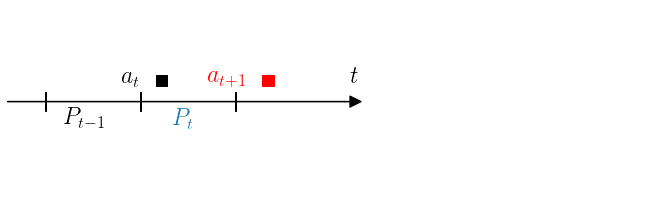

In [3]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(11.6,8))


ax.arrow(-4, 5, 18, 0, width = 0.03, head_width=0.6, head_length=0.6, fc='k', ec='k')
ax.arrow(-2, 4.5, 0, 1, width = 0.03, head_width=0.0, head_length=0.0, fc='k', ec='k')
ax.arrow(3, 4.5, 0, 1, width = 0.03, head_width=0.0, head_length=0.0, fc='k', ec='k')
ax.arrow(8, 4.5, 0, 1, width = 0.03, head_width=0.0, head_length=0.0, fc='k', ec='k')

ax.annotate(r'$P_t$', (4.7, 3.8), color = 'C0')
ax.annotate(r'$P_{t-1}$', (-1, 3.8) )
ax.annotate(r'$a_t$', (2, 6), color = 'k')
ax.annotate(r'$a_{t+1}$', (6.5, 6), color = 'r')

strain_after = mpatches.Rectangle((9.4, 5.8), 0.6, 0.6,
                      color = 'r')

ax.add_artist(strain_after)

strain_before = mpatches.Rectangle((3.8, 5.8), 0.6, 0.6,
                      color = 'k')

ax.add_artist(strain_before)

ax.annotate(r'$t$', (14, 6))


ax.set_aspect('equal')
ax.set_xlim([-4, 30])
ax.set_ylim([0, 10])

ax.axis("off")


plt.show()

plt.rcParams['pdf.fonttype'] = 'TrueType'

save_fig(fig, 'fig0_axis')